In this notebook, I am going to try some algorithm to predict the survivability of the Titanic's passangers. There are some steps that I am going to do to predict the data which are:
- Load the data
- Clean the data
- Feature engineering to spot any potential attribute that can be used to optimize the model.
- Predict the data by using some algorithm and choose the best score of the model.

**First step: Load and Check the Data**

In [27]:
#import all the required library
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy as sc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import sklearn

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


#ignore warnings
import warnings
warnings.filterwarnings('ignore')


#import machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 8

gender_submission.csv
test.csv
train.csv



First I loaded the data from the training and test dataset and checked the 5 rows randomly from training dataset.

In [28]:
#load the data
train = pd.read_csv('C:\Learning Stuff\Self\Tokopedia\train.csv')
test = pd.read_csv('C:\Learning Stuff\Self\Tokopedia\test.csv')

#check the top 5 from train data
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S


Columns from the data:
1. PassengerID
2. Survived: the main attribute that will be predicted.
3. Pclass: passanger class.
4. Name: name of each passager. At first glance it looks like it's all consisted of String datatype but we can extract the title of the name and used it in separate attribute.
5. Sex
6. Age
7. SibSp: number of sibling or spuose associated with the passanger.
8. Parch: number of parent or children associated with the passanger.
9. Ticket: ticket number
10. Fare: Fare of each passanger.
11. Cabin: Cabin number
12. Embarked: Port of embarkation of each passanger. There are 3 values for embarked which are C (Cherbourgh), Q (Queenstown), and S (Southampton).


The next step is that I am going to check the data and found out if there is any outlier or missing value.

In [29]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Byles, Rev. Thomas Roussel Davids",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [30]:
#check if there is any missing value

print(train.info())
train.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S


There's a high chance that there are some outliers in age and fare. Additional data checking needs to be done to the age attribute to check if there is any illogical instance such as age that is above 200.

In [31]:
print('Training dataset with null values:\n', train.isnull().sum())

Training dataset with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


I combine the data to make the feature engineering easier.

In [32]:
#combine train with test data.
data_combine = [train, test]

**Feature Engineering**

In this section I am going modify some feature to clear the missing data for Age, Embarked, and Fare feature. For Age and Fare features I am going to use the median of them because the data type of those features which are numerical. As for Embarked I am going to use the mode of it because Embarked data type is categorical..

In [33]:
for dataset in data_combine:    
    #fill missing age with median of the age
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #fill missing value in embarked with mode of the embarked
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #fill missing fare with median of the fare
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the ID, Cabin, and ticket feature from training dataset.
drop_column = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace = True)

print(train.isnull().sum())
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


The next step for feature engineering is modify some other feature to comply with its datatype. The first additional feature that was added is IsAlone. Feature IsAlone is used to check whether a passanger has any family member in Titanic or not. As for the Title, I separated the title from the name of each passanger.

Fare and Age features will be converted to categorical based on its frequency and value. In this section I also converted all the title that occured only few times (rare title) to one group named 'Others'.



In [34]:
#Feature engineering
for dataset in data_combine:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1 #create family size feature to create IsAlone feature

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 #if a passanger has family member, isAlone will be 0
    
    #split title from names
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0] #split title from the name


    #Fare Bins using frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins using value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
stat_min = 10 #setting up the parameter of the 'rare' title
title_names = (train['Title'].value_counts() < stat_min) #create the title series

#apply the title series to the title column
train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train['Title'].value_counts())


#preview data again
train.info()
test.info()
train.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
204,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,11.1333,S,3,0,Miss,"(7.91, 14.454]","(-0.08, 16.0]"
690,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,57.0000,S,2,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
372,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Others,"(7.91, 14.454]","(16.0, 32.0]"
84,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,10.5000,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
126,0,3,"McMahon, Mr. Martin",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


**Formatting The Data**

In this section I will convert every categorical data using LabelEncoder from sklearn package to give index for each instance of the categorical data. The categorical data that will be converted are Sex, Embarked, Title, Age, and Fare.

In [35]:
#convert categorical data
label = LabelEncoder()
for dataset in data_combine:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable as Target
Target = ['Survived']

#define x variables for original features aka feature selection
train_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
train_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
train_xy =  Target + train_x
print('Original X Y: ', train_xy, '\n')


#define x variables for original without bin features to remove continuous variables
train_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
train_xy_bin = Target + train_x_bin
print('Bin X Y: ', train_xy_bin, '\n')


#define x and y variables for dummy features original
train_dummy = pd.get_dummies(train[train_x])
train_x_dummy = train_dummy.columns.tolist()
train_xy_dummy = Target + train_x_dummy
print('Dummy X Y: ', train_xy_dummy, '\n')


train_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [36]:
#check the data that has been cleaned
print('Train columns with null values: \n', train.isnull().sum())
print('\n')
print (train.info())
print('\n')

print('Test/Validation columns with null values: \n', test.isnull().sum())
print('\n')
print (test.info())
print('\n')

train.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null category
AgeBin

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891.000000,891,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,NaN,NaN,5,4,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Byles, Rev. Thomas Roussel Davids",male,NaN,NaN,NaN,NaN,S,NaN,NaN,Mr,"(7.91, 14.454]","(16.0, 32.0]",NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,NaN,NaN,517,224,525,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,1.904602,0.602694,NaN,NaN,NaN,0.647587,1.536476,1.906846,1.288440,1.497194
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,1.613459,0.489615,NaN,NaN,NaN,0.477990,0.791503,0.798361,0.812038,1.118156
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2.000000,1.000000,0.500000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,2.000000,1.000000,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,2.000000,2.000000,2.000000


After ensuring that the data has been cleaned, the next step is calculating correlation of the feature and the target.

In [37]:
#Calculate the feature correlation by using group by
for x in train_x:
    if train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('\n')
        

#crosstab for the title
print(pd.crosstab(train['Title'],train[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908


Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2      Mr  0.156673
3     Mrs  0.792000
4  Others  0.444444


Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724

**Pairplot and Correlation Heatmap**

Beside checking the correlation by using group by, the correlation can also be checked by using Pairplot and Correlation Heatmap.

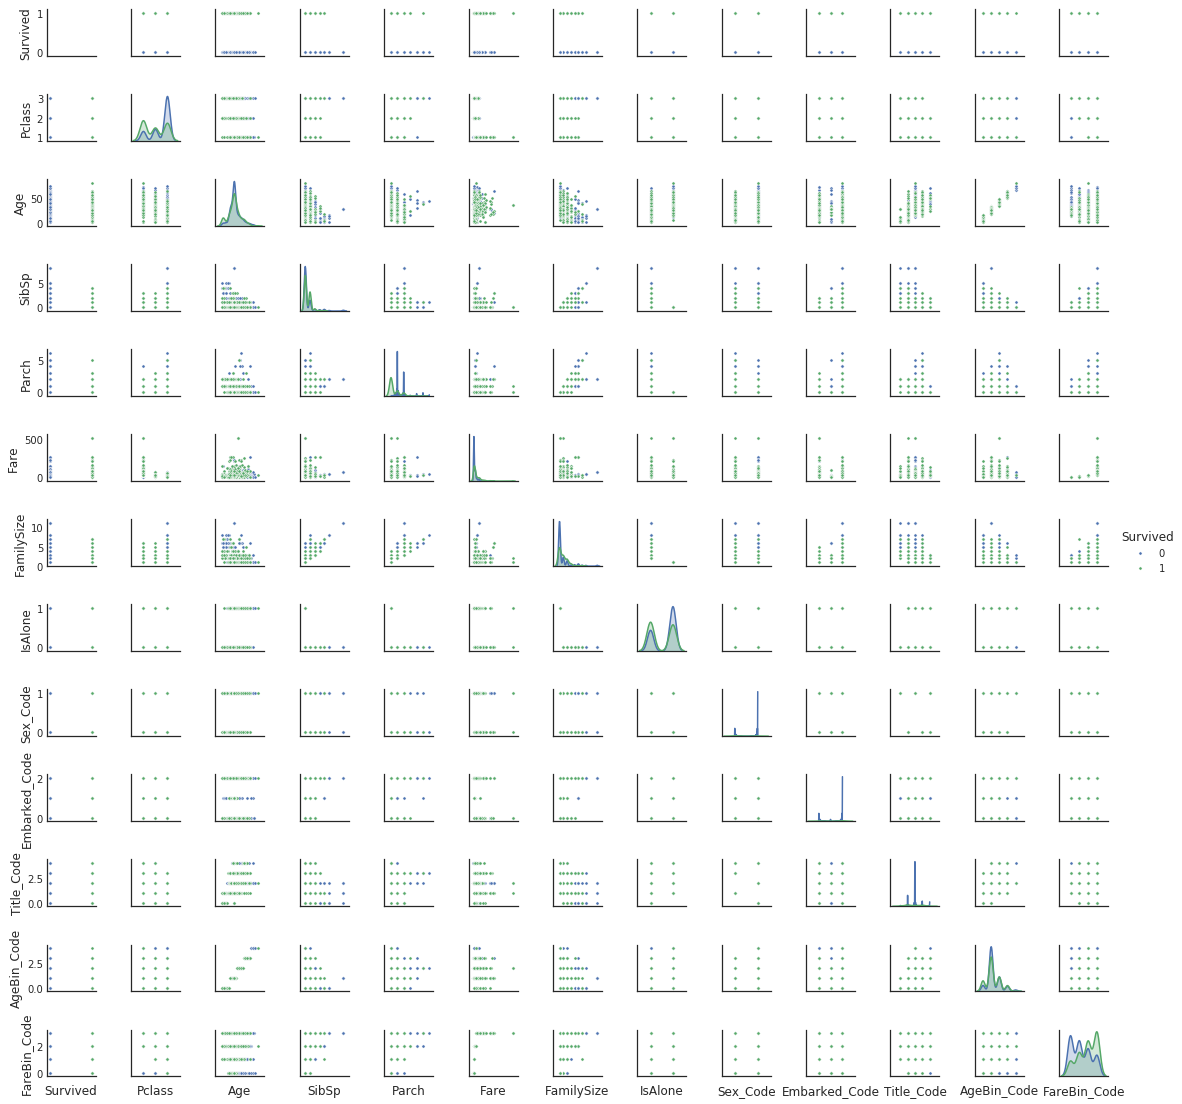

In [38]:
#pair plots
pp = sns.pairplot(train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

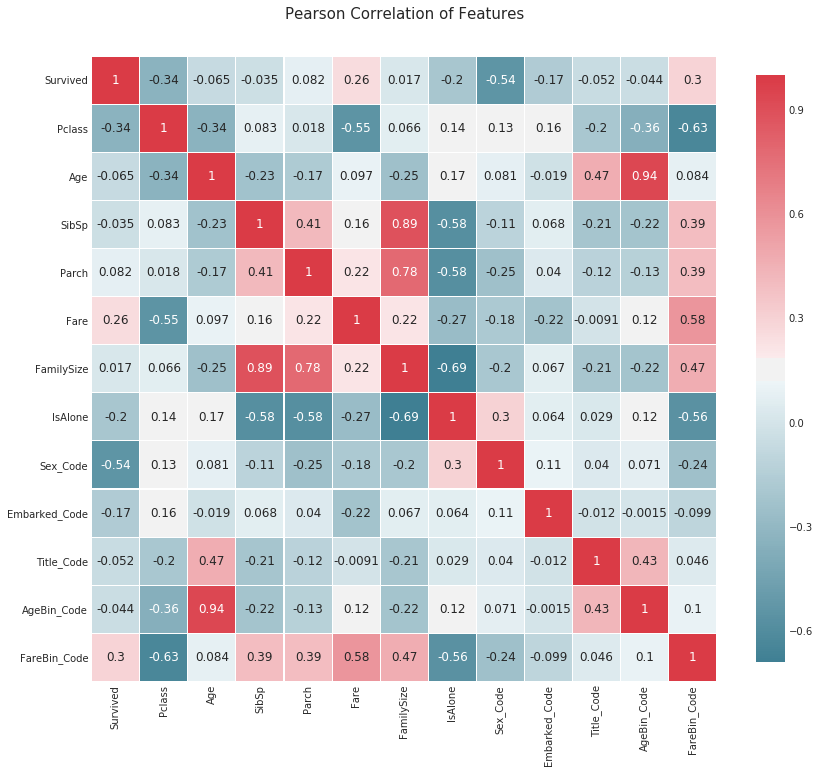

In [39]:
#correlation heatmap
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

**Predictive Analysis**

The last section in this notebook will be predictive analysis. For the prediction I am going to use SVM, Random Forest, and Logistic Regression. Each algorithm will be evaluated and the most suitable one will be chosen.

In [40]:
#drop unnecessary column
titanic_training = train.drop(['Name','Sex', 'FareBin', 'AgeBin', 'Embarked', 'Title', 'Fare'], axis=1)
titanic_test   = test.drop(['Name','Sex', 'FareBin', 'AgeBin', 'Embarked', 'Title', 'Cabin', 'Fare', 'Ticket'], axis=1)

titanic_test.dtypes.sample(10)

IsAlone            int64
AgeBin_Code        int64
FamilySize         int64
Age              float64
Sex_Code           int64
Parch              int64
Embarked_Code      int64
SibSp              int64
Title_Code         int64
Pclass             int64
dtype: object

In [41]:
# define training and testing sets

X_train = titanic_training.drop("Survived",axis=1)
Y_train = titanic_training["Survived"]
X_test  = titanic_test.drop("PassengerId",axis=1).copy()

In [42]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.8709315375982043

In [43]:
#prediction by using logistic regression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.80022446689113358

In [44]:
#prediction by using random forest

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.95173961840628507

Based on the calculation above, Random Forest has the biggest score for the model. So I am going to use random forest algorithm for the prediction of the test set. Before calculating the test set, I am going to check the importances of the feature to know which feature has the biggest contribution to the Target (Survival). Feature contribution will be calculated by using correlation coefficient from logistic regression and forests of tress

In [45]:
X_train.sample(10)

,Pclass,Age,SibSp,Parch,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
250,3,28.0,0,0,1,1,1,2,2,1,0
661,3,40.0,0,0,1,1,1,0,2,2,0
624,3,21.0,0,0,1,1,1,2,2,1,2
228,2,18.0,0,0,1,1,1,2,2,1,1
421,3,21.0,0,0,1,1,1,1,2,1,0
179,3,36.0,0,0,1,1,1,2,2,2,0
223,3,28.0,0,0,1,1,1,2,2,1,0
674,2,28.0,0,0,1,1,1,2,2,1,0
582,2,54.0,0,0,1,1,1,2,2,3,2
667,3,28.0,0,0,1,1,1,2,2,1,0


In [46]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_training.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = Series(logreg.coef_[0])
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.597463
1,Age,-0.023830
2,SibSp,-1.267124
3,Parch,-0.966922
4,FamilySize,0.697833
5,IsAlone,-0.404235
6,Sex_Code,-2.476916
7,Embarked_Code,-0.149373
8,Title_Code,-0.203617
9,AgeBin_Code,-0.019654


Feature ranking:
1. feature 6 (0.264625)
2. feature 1 (0.258462)
3. feature 0 (0.110580)
4. feature 8 (0.091254)
5. feature 10 (0.075202)
6. feature 9 (0.044783)
7. feature 4 (0.042908)
8. feature 7 (0.038093)
9. feature 2 (0.037607)
10. feature 3 (0.021738)
11. feature 5 (0.014749)


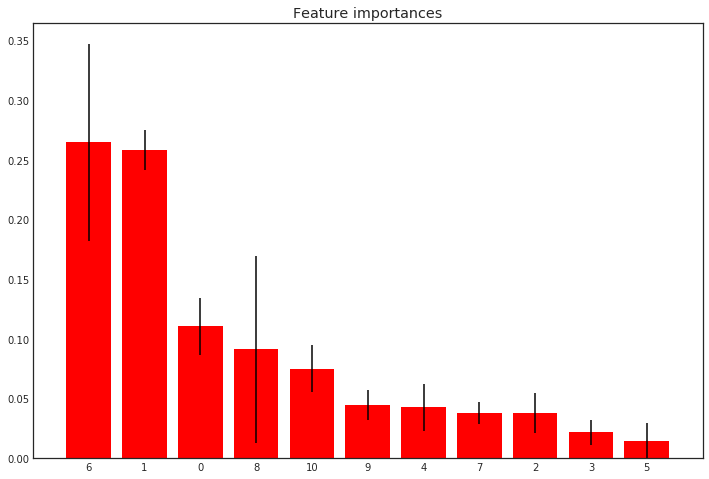

In [47]:
#rank the features imporance by using forest of trees

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Based on the feature importance graph above, the top 5 most importance features are:
1. Sex
2. Age 
3. Passanger Class
4. Title
5. Fare


All there's left to do is writing the result in a new file called 'titanic_result'

In [48]:
submission = DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_result.csv', index=False)